In [2]:
import numpy as np
import struct
from math import *
from scipy.signal import convolve2d

width = 240
height = 180

def load_img(name, width = width, height=height, flip = False):
    with open(f"d:\\git\\srobot\\analysis\\v7\\{name}.dump", mode='rb') as file: # b is important -> binary
        fileContent = file.read()
    img = np.zeros((width, height))
    x = 0
    y = 0
    for v in struct.iter_unpack("d", fileContent):
        img[x,height - y - 1 if flip else y] = v[0]
        x += 1
        if x == width:
            x = 0
            y += 1
    return img

def gaussian_kernel_2d(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1/(2*pi*sigma**2)) * np.exp(
            (-1*((x-(size-1)/2)**2 + (y-(size-1)/2)**2))/(2*sigma**2)
        ),
        (size, size)
    )
    return kernel / np.sum(kernel)

import numpy as np
from PIL import Image

def getImage(img):
    array = np.zeros((img.shape[1],img.shape[0]))
    vmin = 10000000
    vmax = 0
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            v = img[x,y]
            if v < vmin:
                vmin = v
            if v > vmax:
                vmax = v
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            v = int((img[x,y] - vmin) * 255 / (vmax - vmin))
            array[y,x] = v
    return Image.fromarray(array)

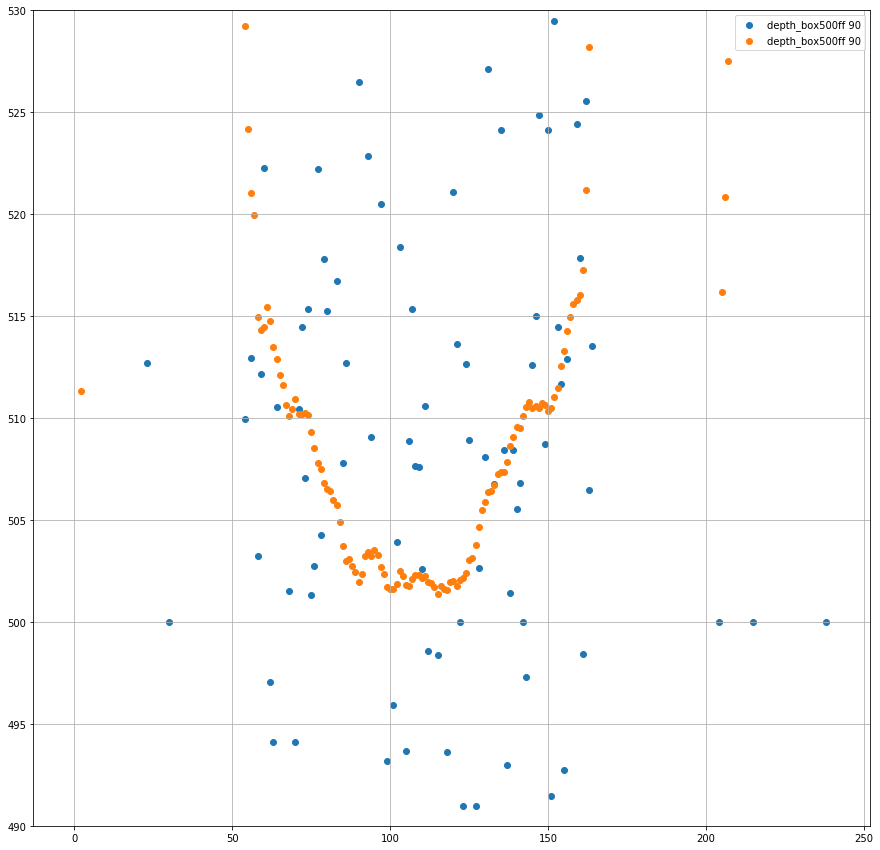

In [3]:
kernel_size = 7
sigma = 3
gaussian_kern = gaussian_kernel_2d(kernel_size, sigma)

def draw(ax, name, y=90, filtered=False):
    x = range(width)
    img = load_img(name)
    if filtered:
        img = convolve2d(img, gaussian_kern, mode='same')
    #filtered = convolve2d(img, gaussian_kern, mode='same')
    #ax.scatter(x, [filtered[i,y] for i in x], label=f"{name} {y}")
    ax.scatter(x, [img[i,y] for i in x], label=f"{name} {y}")

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

#draw(ax, "depth_box300")
#draw(ax, "depth_box500ff",179)
#draw(ax, "depth_box500ff",170)
#draw(ax, "depth_box500ff",160)
#draw(ax, "depth_box500ff",150)
#draw(ax, "depth_box500ff",140)
#draw(ax, "depth_box500ff",130)
#draw(ax, "depth_box500ff",120)
#draw(ax, "depth_box500ff",110)
#draw(ax, "depth_box500ff",100)
draw(ax, "depth_box500ff",90)
draw(ax, "depth_box500ff",90, filtered=True)
#draw(ax, "depth_box500ff",80)
#draw(ax, "depth_box500ff",70)
#draw(ax, "depth_box500ff",60)
#draw(ax, "depth_box500ff",50)
#draw(ax, "depth_box500ff",40)
#draw(ax, "depth_box500ff",30)
#draw(ax, "depth_box500ff",20)
#draw(ax, "depth_box500ff",10)
#draw(ax, "depth_box500ff",1)
#draw(ax, "depth_box500ff",10, filtered = True)
#draw(ax, "depth_box500ff",1, filtered = True)
#draw(ax, "depth_box1000")

ax.grid(True)
ax.legend()
#ax.set_xlim(50,170)
ax.set_ylim(490,530)

    
plt.show()

In [5]:
def count_diff(img, s, r, x, y):
    msize = s.shape[1]
    r = int((sqrt(msize) - 1) / 2)
    yv= np.zeros(msize)
    k = 0
    for i in range(-r, r+ 1):
        for j in range(-r, r+ 1):
            yv[k] = img[x+i,y+j]
            k += 1
    sf = np.dot(s,yv)
    #print(sf)

    sumd = 0
    for i in range(-r, r+ 1):
        for j in range(-r, r+ 1):
            sumd += abs(i * sf[0] + j * sf[1] + sf[2] - img[x+i,y+j])
    return sumd / k

def count_s(r):
    msize = (r * 2 + 1) * (r * 2 + 1)
    m = np.zeros((msize,3))
    k = 0
    for i in range(-r, r+ 1):
        for j in range(-r, r+ 1):
            m[k,0] = i
            m[k,1] = j
            m[k,2] = 1
            k+=1
    mt = m.transpose()
    return np.dot(np.linalg.inv(np.dot(mt, m)),mt)

r = 4
s = count_s(r)

img = load_img("depth_box500ff")
for y in range(1, height,20):
    for x in range(1, width,20):
        sdiff = count_diff(img, s, r, x, y)
        print(f"[{x:3},{y:3}] {sdiff}")

[  1,  1] 343.3113982054138
[ 21,  1] 290.90857639685856
[ 41,  1] 234.1812280579378
[ 61,  1] 207.9849561666802
[ 81,  1] 170.22151694927885
[101,  1] 239.94103553614278
[121,  1] 219.04768969037244
[141,  1] 216.89381994665956
[161,  1] 231.97144457449488
[181,  1] 239.7915454999443
[201,  1] 299.1232473480727
[221,  1] 267.1297105012956
[  1, 21] 150.4952820369151
[ 21, 21] 118.52122733337498
[ 41, 21] 87.02167671157557
[ 61, 21] 44.427900215045355
[ 81, 21] 39.456656430153046
[101, 21] 37.3589363349808
[121, 21] 46.21979419135183
[141, 21] 39.17432325750145
[161, 21] 43.86393997266996
[181, 21] 78.0059819477044
[201, 21] 110.37484824736732
[221, 21] 137.65857234206734
[  1, 41] 209.73512772062756
[ 21, 41] 221.81429907262552
[ 41, 41] 156.5682148400793
[ 61, 41] 14.958545205577183
[ 81, 41] 14.793959579270735
[101, 41] 16.603754050962575
[121, 41] 15.948853156501585
[141, 41] 17.615732189570416
[161, 41] 25.138007364572843
[181, 41] 37.92257961648533
[201, 41] 86.23739609265152
[22

In [17]:
# get view angle

from math import *

w=254
h=203

# 300 w=3..191 h=28..176    45.88912020914061   37.384783861879846    58.58185558613695 x 55.8110921462521
# 400 w=28..169 h 43..154   35.22928660001408   28.476569512599003    59.96474314896014 x 57.128572864887694
# 500 w=46..157 h=53..141   28.503482774796986  22.95022601345025     61.629151945507 x 58.30257840299384
# 800 w=71..139   h=68..121 18.040862620824367  14.461537296249436    63.673632779380114 x 61.27085418393182
#1000 w=81..137   h=71..114  14.475634097534247 11.591346362314619    62.03843184657535 x 60.595677617585224

print(2*atan(w/(1000*2)) * 180 * 240 / pi /(137-81))
print(2*atan(w/(1000*2)) * 180 * 180 / pi /(114-71))

62.03843184657535
60.595677617585224


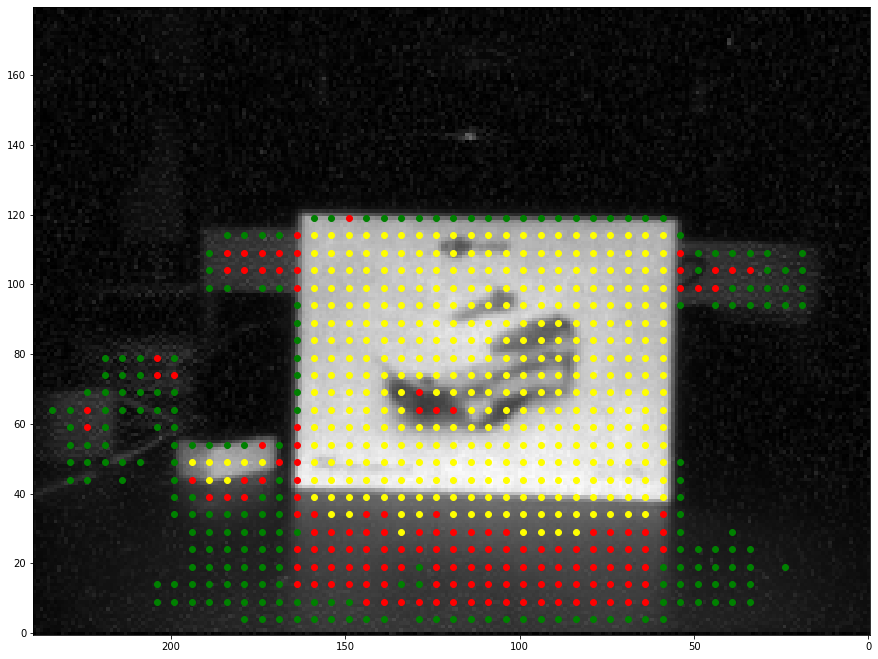

In [18]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

img = load_img("color_box500ff", flip=False)
plt.imshow(getImage(img))

r = 4
s = count_s(r)
img = load_img("depth_box500ff")
for y in range(r, height - r,5):
    for x in range(r, width - r,5):
        sdiff = count_diff(img, s, r, x, y)
        #print(f"[{x:3},{y:3}] {sdiff}")
        if sdiff < 30:
            plt.scatter([x],[y], c='yellow')
        else:
            if sdiff < 50:
                plt.scatter([x],[y], c='red')
            else:
                if sdiff < 100:
                    plt.scatter([x],[y], c='green')


#ax.grid(True)
#ax.legend()
#ax.set_xlim(50,170)
#ax.set_ylim(490,530)
ax.invert_yaxis()
ax.invert_xaxis()
    
plt.show()

In [11]:
count_s(6)

array([[-0.00253593, -0.00253593, -0.00253593, -0.00253593, -0.00253593,
        -0.00253593, -0.00253593, -0.00253593, -0.00253593, -0.00253593,
        -0.00253593, -0.00253593, -0.00253593, -0.00211327, -0.00211327,
        -0.00211327, -0.00211327, -0.00211327, -0.00211327, -0.00211327,
        -0.00211327, -0.00211327, -0.00211327, -0.00211327, -0.00211327,
        -0.00211327, -0.00169062, -0.00169062, -0.00169062, -0.00169062,
        -0.00169062, -0.00169062, -0.00169062, -0.00169062, -0.00169062,
        -0.00169062, -0.00169062, -0.00169062, -0.00169062, -0.00126796,
        -0.00126796, -0.00126796, -0.00126796, -0.00126796, -0.00126796,
        -0.00126796, -0.00126796, -0.00126796, -0.00126796, -0.00126796,
        -0.00126796, -0.00126796, -0.00084531, -0.00084531, -0.00084531,
        -0.00084531, -0.00084531, -0.00084531, -0.00084531, -0.00084531,
        -0.00084531, -0.00084531, -0.00084531, -0.00084531, -0.00084531,
        -0.00042265, -0.00042265, -0.00042265, -0.0

In [13]:
r = 4
s = count_s(r)
x = 120
y = 90

img = load_img("depth_box500ff")
sdiff = count_diff(img, s, r, x, y)
print(f"[{x:3},{y:3}] {sdiff}")
print(s[0,0],img[0,0])

[120, 90] 14.316634997836982
-0.007407407407407408 1000.0
